## Summarize simulation results

In [1]:
import os
import sys
sys.path.append('../scripts/')

In [2]:
from settings import DEFAULT_PARAMS
from sim_utils import set_causal_snps

In [3]:
import numpy as np
import pandas as pd
from snakemake.utils import Paramspace

In [4]:
import seaborn as sns

### Read dataframe with simulation parameters

In [5]:
params = pd.read_csv('../params.csv')
params['outfile'] = [p + '.txt' for p in Paramspace(params).instance_patterns]

In [6]:
params

,r0,v0,cells_per_individual,outfile
0,0.00,0.10,fixed,r0~0.0/v0~0.1/cells_per_individual~fixed.txt
1,0.25,0.10,fixed,r0~0.25/v0~0.1/cells_per_individual~fixed.txt
2,0.50,0.10,fixed,r0~0.5/v0~0.1/cells_per_individual~fixed.txt
3,0.00,0.25,fixed,r0~0.0/v0~0.25/cells_per_individual~fixed.txt
4,0.25,0.25,fixed,r0~0.25/v0~0.25/cells_per_individual~fixed.txt
5,0.50,0.25,fixed,r0~0.5/v0~0.25/cells_per_individual~fixed.txt
6,0.00,0.10,variable,r0~0.0/v0~0.1/cells_per_individual~variable.txt
7,0.25,0.10,variable,r0~0.25/v0~0.1/cells_per_individual~variable.txt
8,0.50,0.10,variable,r0~0.5/v0~0.1/cells_per_individual~variable.txt
9,0.00,0.25,variable,r0~0.0/v0~0.25/cells_per_individual~variable.txt


### Compute true positives (power) and false positives

In [36]:
def compute_tpr(pvals, gxe_causals, threshold=0.05):
    """"True positive rate across all tested SNPs."""
    if len(gxe_causals) == 0:
        return 1
    return (pvals[:, gxe_causals] < threshold / pvals.shape[1]).mean()

def compute_fpr(pvals, gxe_causals, threshold=0.05):
    """"False positive rate across all tested SNPs."""
    return (pvals[:, [i for i in range(pvals.shape[1]) if i not in gxe_causals]] < threshold / pvals.shape[1]).mean()

def get_causal_gxe(idx):
    """Check if default simulation parameters were changed and return ids of causal gxe SNPs."""
    if params.loc[i, 'r0'] == 0:
        return []
    n_causal_g = params.loc[idx, 'n_causal_g'] if 'n_causal_g' in params.columns else DEFAULT_PARAMS['n_causal_g']
    n_causal_gxe = params.loc[idx, 'n_causal_gxe'] if 'n_causal_gxe' in params.columns else DEFAULT_PARAMS['n_causal_gxe']
    return set_causal_snps(n_causal_g=n_causal_g, n_causal_gxe=n_causal_gxe)[1]

In [37]:
params[['tpr', 'fpr']] = np.nan

for i in params.index:
    fname = '../results/simulations/' + params.loc[i, 'outfile']
    if os.path.exists(fname):
        pvals = pd.read_csv(fname, header=None).to_numpy()
        causals = get_causal_gxe(i)
        params.loc[i, 'tpr'] = compute_tpr(pvals, causals)
        params.loc[i, 'fpr'] = compute_fpr(pvals, causals)

In [39]:
params

,r0,v0,cells_per_individual,outfile,tpr,fpr
0,0.00,0.10,fixed,r0~0.0/v0~0.1/cells_per_individual~fixed.txt,1.00,0.000800
1,0.25,0.10,fixed,r0~0.25/v0~0.1/cells_per_individual~fixed.txt,0.98,0.003333
2,0.50,0.10,fixed,r0~0.5/v0~0.1/cells_per_individual~fixed.txt,1.00,0.005000
3,0.00,0.25,fixed,r0~0.0/v0~0.25/cells_per_individual~fixed.txt,1.00,0.000800
4,0.25,0.25,fixed,r0~0.25/v0~0.25/cells_per_individual~fixed.txt,NaN,NaN
5,0.50,0.25,fixed,r0~0.5/v0~0.25/cells_per_individual~fixed.txt,1.00,0.016667
6,0.00,0.10,variable,r0~0.0/v0~0.1/cells_per_individual~variable.txt,1.00,0.002400
7,0.25,0.10,variable,r0~0.25/v0~0.1/cells_per_individual~variable.txt,0.96,0.002500
8,0.50,0.10,variable,r0~0.5/v0~0.1/cells_per_individual~variable.txt,1.00,0.004167
9,0.00,0.25,variable,r0~0.0/v0~0.25/cells_per_individual~variable.txt,NaN,NaN


### Visualize

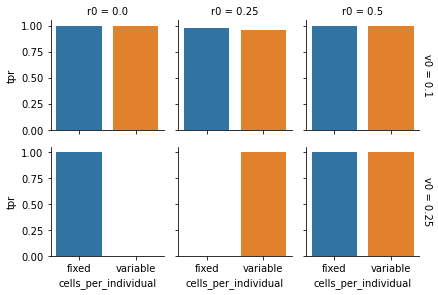

In [40]:
sns.catplot(x='cells_per_individual', y='tpr', col='r0', row='v0', data=params, kind='bar', margin_titles=True, height=2);

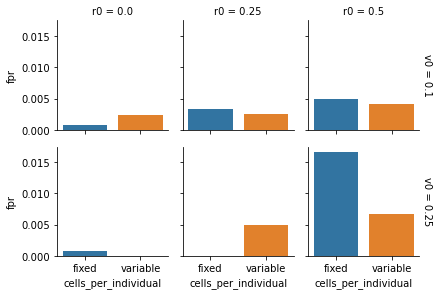

In [41]:
sns.catplot(x='cells_per_individual', y='fpr', col='r0', row='v0', data=params, kind='bar', margin_titles=True, height=2);